# LDF

The output from the stand-alone LDF configuration is in the link below


Note that LDF is currently run by users. Temporarily, we suggest users walk through the following process:
1) Install LDF and activate cupid-analysis
2) Use the `CUPiD/helper_scripts/generate_ldf_config_file.py` script to generate a LDF config file based on a CUPiD configuration file.
   * `cd CUPiD/examples/external_diag_packages`
   * `../../helper_scripts/generate_ldf_config_file.py --cupid-config-loc . --ldf-template ../../externals/LDF/config_clm_unstructured_plots.yaml --out-file LDF_config.yaml`
2) Run LDF with the newly created configuration file.
   * `../../externals/LDF/run_adf_diag LDF_config.yaml`

In [1]:
import os

from IPython.core.display import HTML, Image
from IPython.display import display
import pandas as pd

In [2]:
ldf_root = "."
case_name = None
base_case_name = None
start_date = ""
end_date = ""
base_start_date = None
base_end_date = None
key_plots = None
# ldf_root will be external_diag_packages/computed_notebooks/LDF/

In [3]:
# Parameters
case_name = "b.e30_alpha07c_cesm.B1850C_LTso.ne30_t232_wgx3.242"
base_case_name = "b.e30_alpha07c_cesm.B1850C_LTso.ne30_t232_wgx3.234"
case_nickname = "BLT1850_242"
base_case_nickname = "BLT1850_234"
CESM_output_dir = "/glade/campaign/cesm/development/cross-wg/diagnostic_framework/CESM_output_for_testing"
start_date = "0001-01-01"
end_date = "0021-01-01"
climo_start_year = 1
climo_end_year = 21
base_start_date = "0001-01-01"
base_end_date = "0081-01-01"
base_climo_start_year = 61
base_climo_end_year = 81
obs_data_dir = (
    "/glade/campaign/cesm/development/cross-wg/diagnostic_framework/CUPiD_obs_data"
)
ts_dir = None
lc_kwargs = {"threads_per_worker": 1}
serial = False
ldf_root = "../../examples/key_metrics/LDF_output/"
key_plots = [
    "GPP_ANN_LatLon_Mean.png",
    "ELAI_ANN_LatLon_Mean.png",
    "TOTECOSYSC_GlobalMean_ANN_TimeSeries_Mean.png",
    "RegionalClimo_Amazonia_RegionalClimo_Mean.png",
]
subset_kwargs = {}
product = "/glade/work/tking/cupid_project/other_cupids/234v242/CUPiD/examples/key_metrics/computed_notebooks//lnd/LDF.ipynb"


In [4]:
# Want some base case parameter defaults to equal control case values
if base_case_name is not None:
    if base_start_date is None:
        base_start_date = start_date

    if base_end_date is None:
        base_end_date = end_date

In [5]:
# convert start-date and end-date to year range
case_year_range = [int(start_date.split("-")[0]), int(end_date.split("-")[0]) - 1]

base_case_year_range = [
    int(base_start_date.split("-")[0]),
    int(base_end_date.split("-")[0]) - 1,
]

In [6]:
ldf_comparison_name = "b.e30_alpha07c_cesm.B1850C_LTso.ne30_t232_wgx3.242_1_20_vs_b.e30_alpha07c_cesm.B1850C_LTso.ne30_t232_wgx3.234_1_80"
ldf_root = os.path.join(ldf_root, ldf_comparison_name)
display(
    HTML(
        f'<a href="../LDF/{ldf_comparison_name}/website/index.html" target="_blank" style="font-size: 30px">Full LDF output</a>'
    )
)

## Key Metrics from LDF

Some important things to look at from LDF include a comparison table and a few maps:

In [7]:
comparison_table = os.path.join(ldf_root, "amwg_table_comp.csv")
if os.path.isfile(comparison_table):
    table = pd.read_csv(comparison_table)
    display(HTML(table.to_html(index=False, float_format="{:6g}".format)))

variable,unit,test,control,diff
RNET,W m$^{-2}$,74.064,72.391,1.673


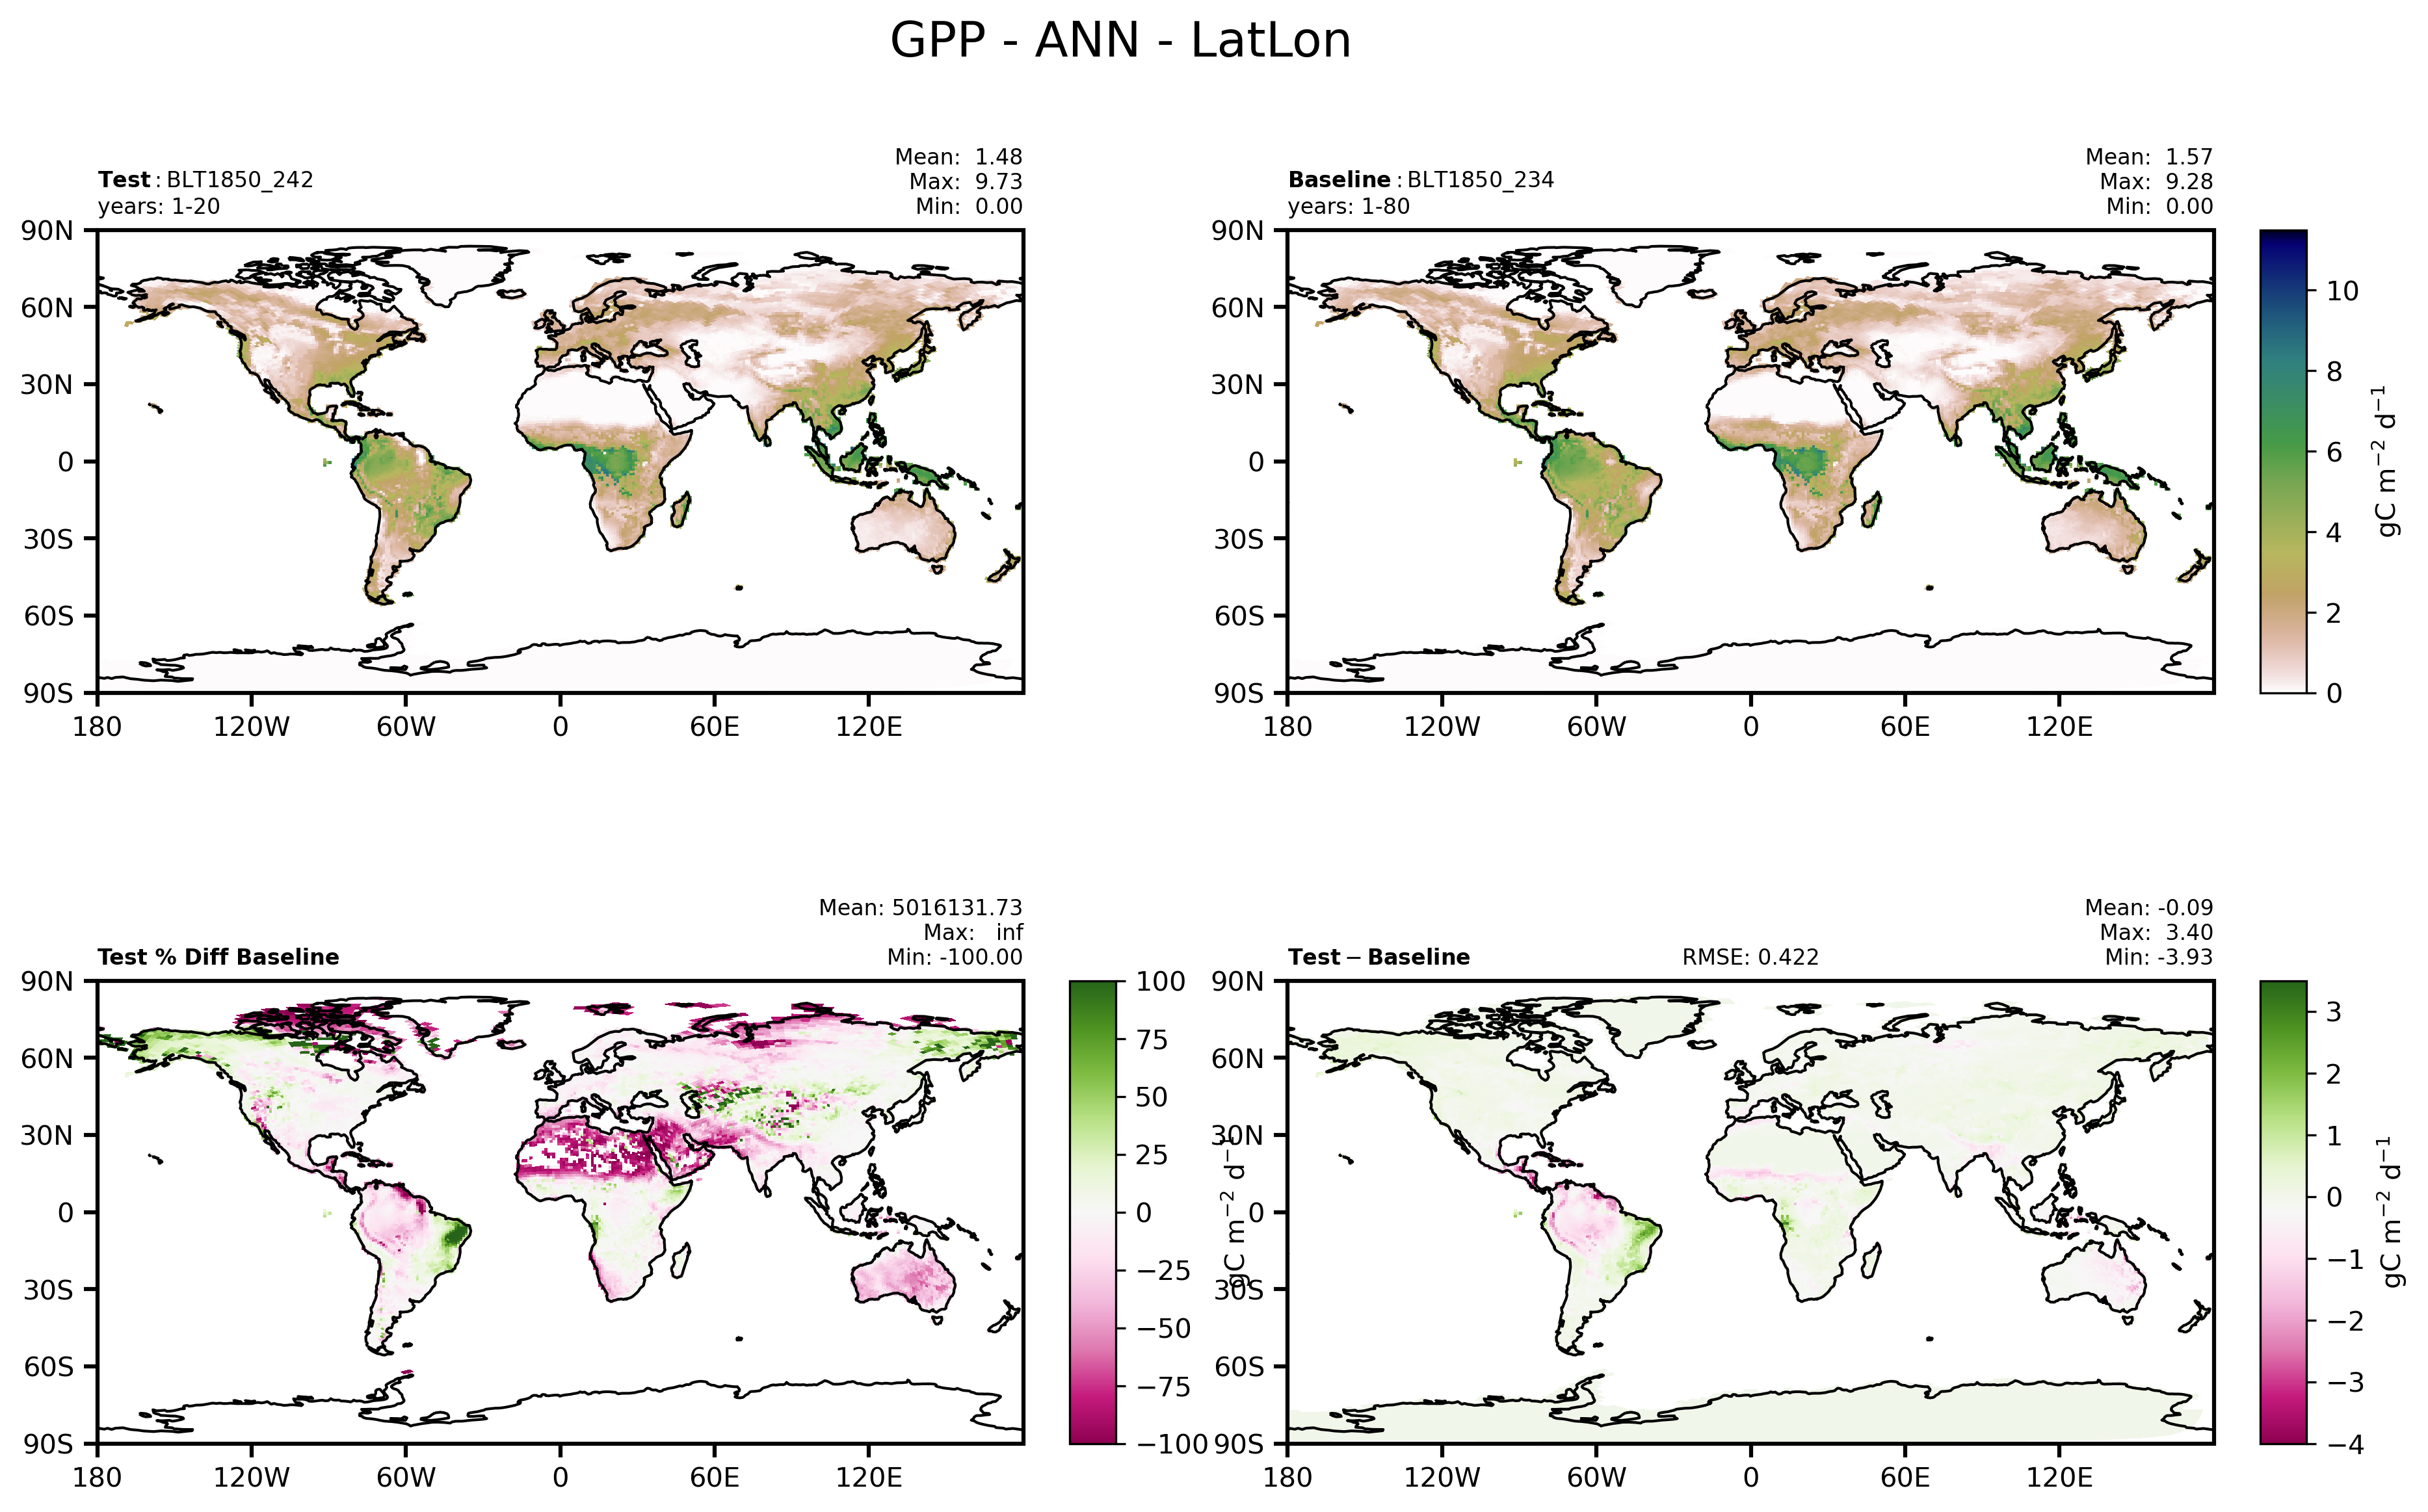

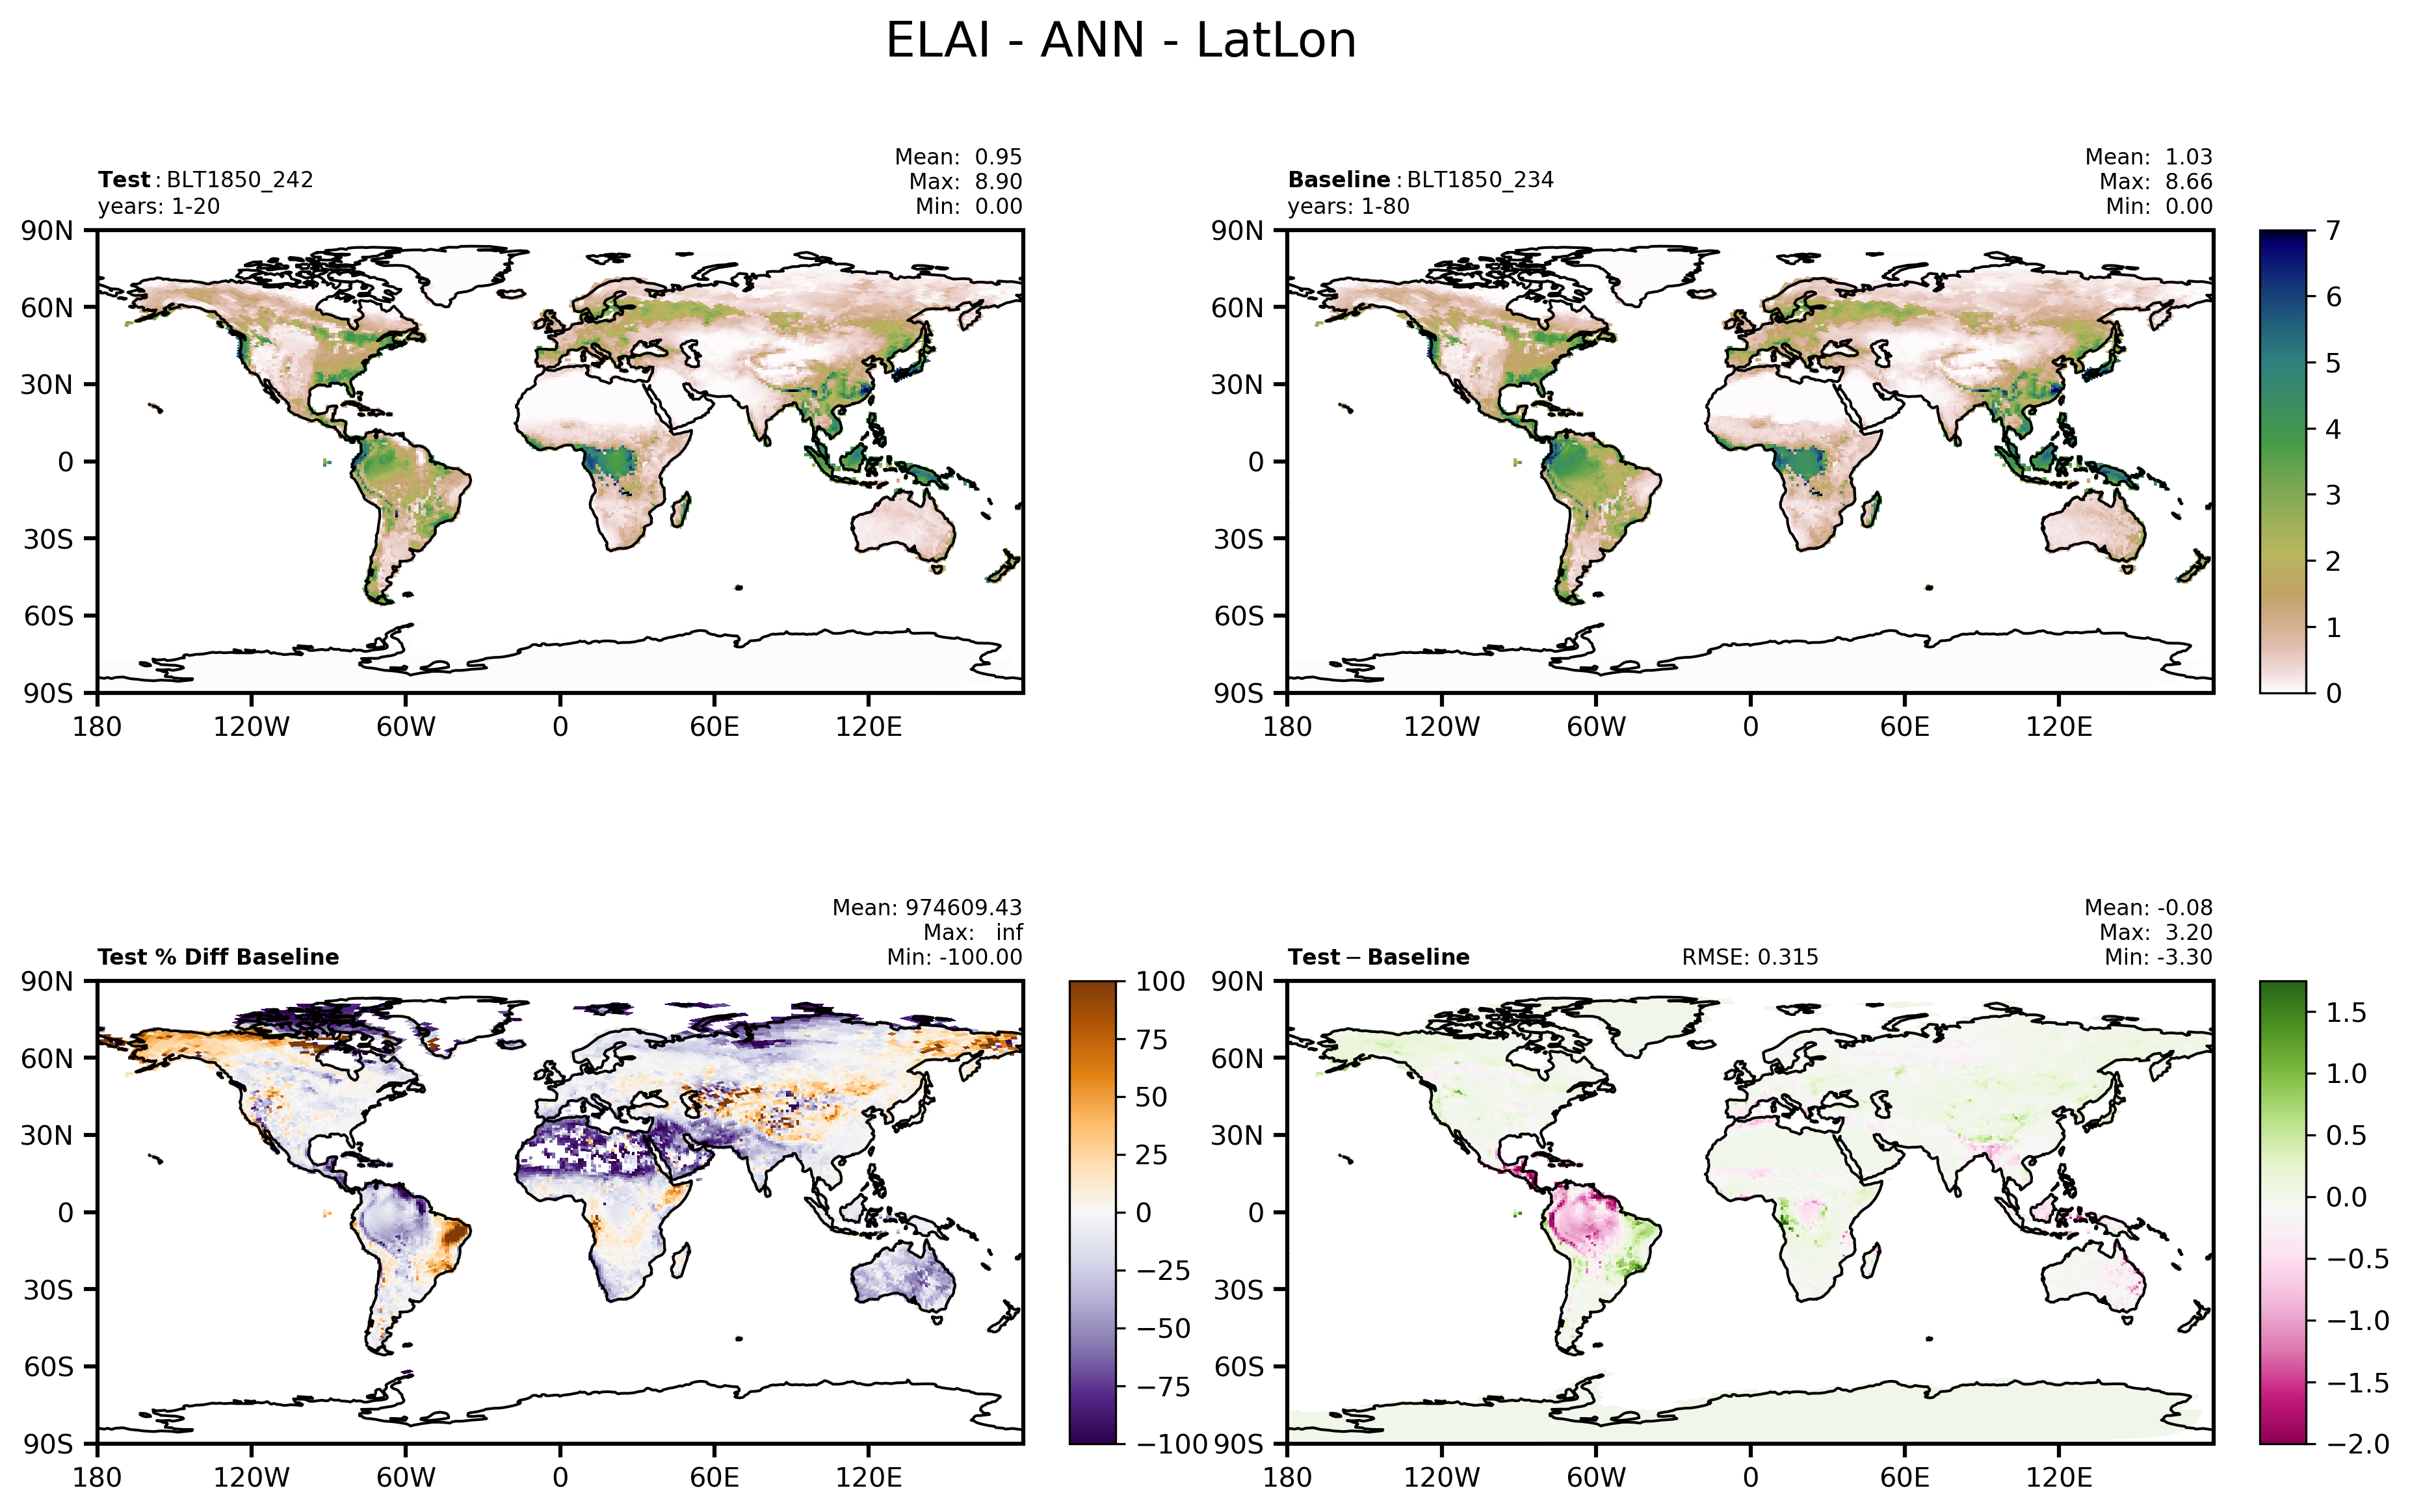

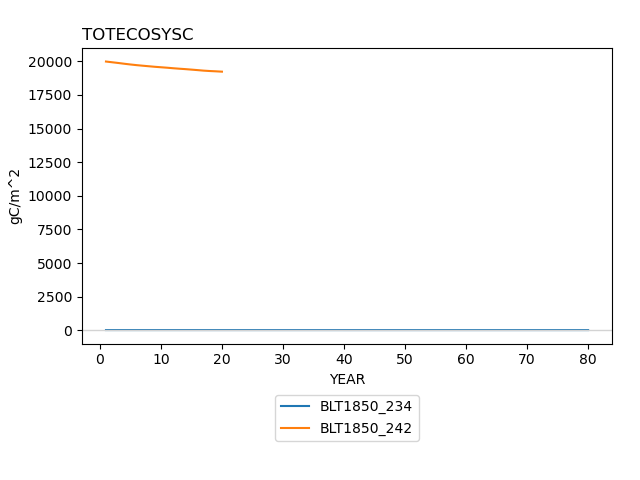

In [8]:
for path_to_key_plot in key_plots:
    full_path = os.path.join(ldf_root, path_to_key_plot)
    if os.path.isfile(full_path):
        display(Image(full_path))